## Задача 1

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.1 Анализ стоимости недвижимости

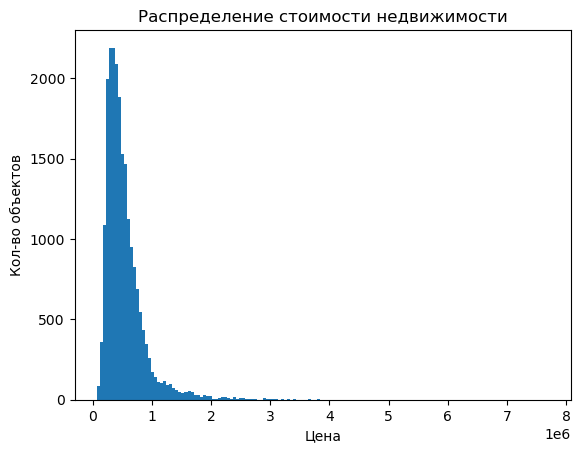

In [14]:
import matplotlib.pyplot as plt
plt.hist(df['price'], bins=150)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Кол-во объектов')
plt.show()

### 1.2 Распределение квадратуры жилой площади

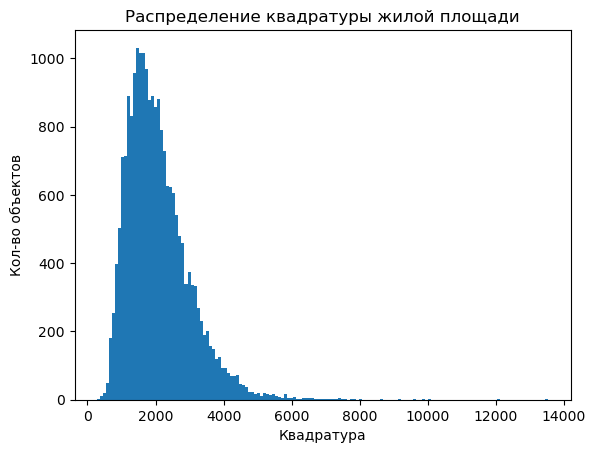

In [6]:
plt.hist(df['sqft_living'], bins=150)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура')
plt.ylabel('Кол-во объектов')
plt.show()

### 1.3 Распределение года постройки

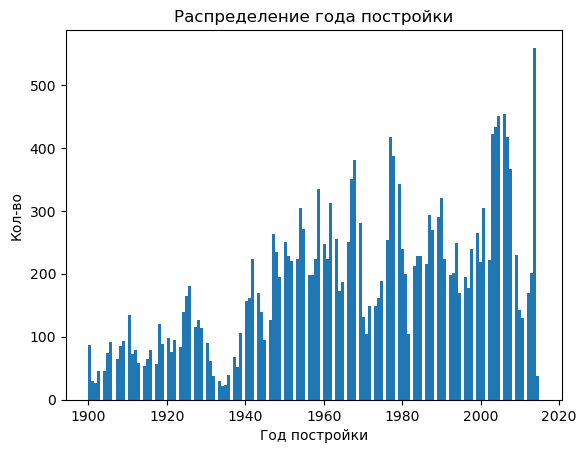

In [15]:
plt.hist(df['yr_built'], bins=150)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во')
plt.show()

## Задача 2

### 2.1 Распределение домов от наличия вида на набережную

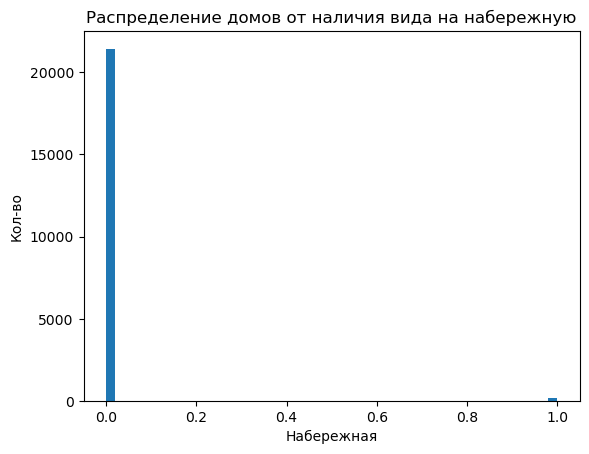

In [19]:
plt.hist(df['waterfront'], bins=50)
plt.title('Распределение домов от наличия вида на набережную')
plt.xlabel('Набережная')
plt.ylabel('Кол-во')
plt.show()

### 2.2 Распределение этажей домов

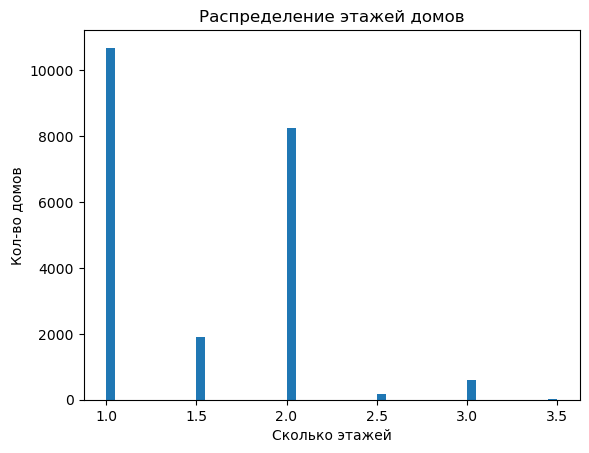

In [18]:
plt.hist(df['floors'], bins=50)
plt.title('Распределение этажей домов')
plt.xlabel('Сколько этажей')
plt.ylabel('Кол-во домов')
plt.show()

### 2.3 Распределение состояния домов

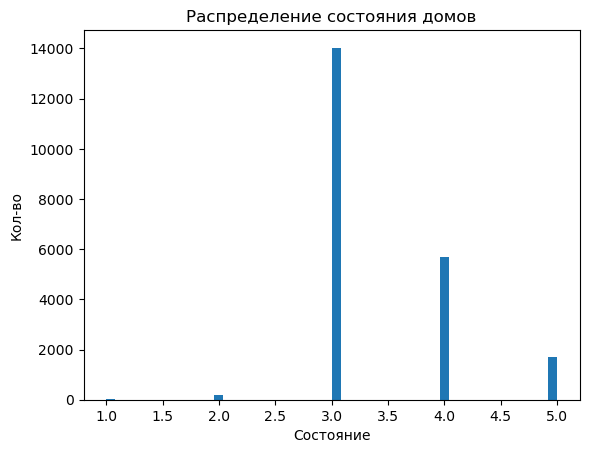

In [12]:
plt.hist(df['condition'], bins=50)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние')
plt.ylabel('Кол-во')
plt.show()

## Задача 3

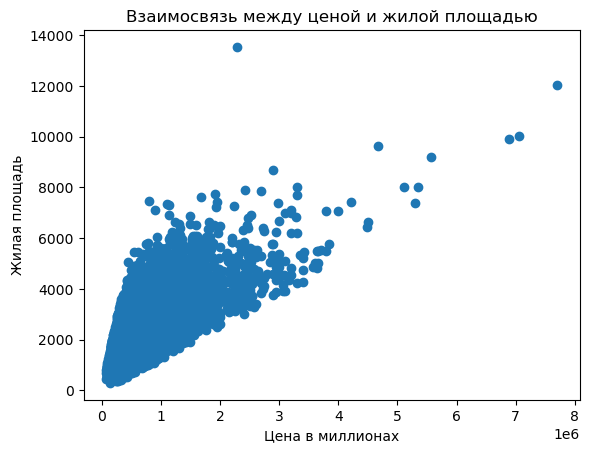

In [20]:
plt.scatter(df['price'], df['sqft_living'])
plt.title('Взаимосвязь между ценой и жилой площадью')
plt.xlabel('Цена в миллионах')
plt.ylabel('Жилая площадь')
plt.show()

* Скаттерплот показывает, что большинство объектов недвижимости имеют параметры: Стоимость до 2.5 миллионов; Квадратура до 5000  и эти параметры взаимозависимы, чем выше площадь, тем выше стоимость. Но есть и выбросы,в том числе значительно удалённые. Например, один из домов 2.5 миллиона имеет площадь почти в 14000 , или же например один из домов с квадратурой 12000 квадратными метрами имеет цену в 7.7 миллионов.

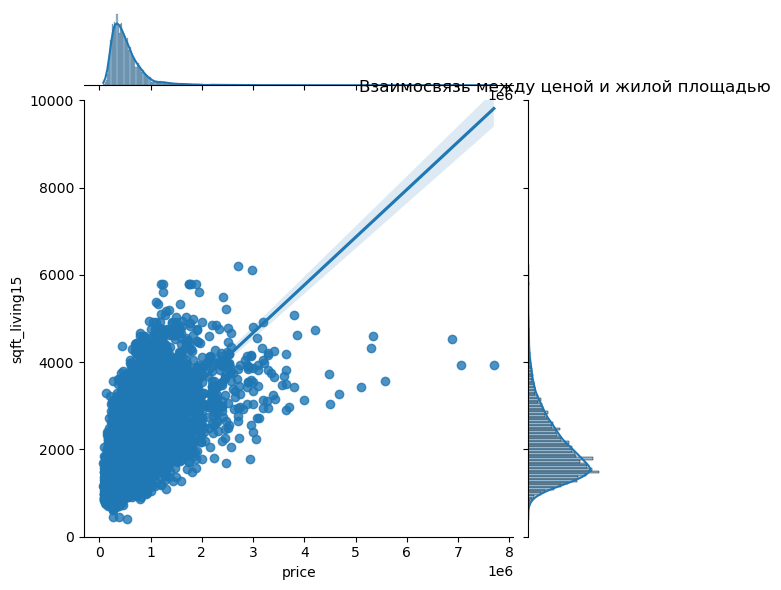

In [23]:
sns.jointplot(x=df['price'], y=df['sqft_living15'], kind='reg')
plt.title('Взаимосвязь между ценой и жилой площадью')
plt.xlabel('Цена в миллионах')
plt.ylim(0, 10000)
plt.ylabel('Жилая площадь')
plt.show()

* Делаем вывод, что увеличение жилой площади дома ведёт к увеличению стоимости.

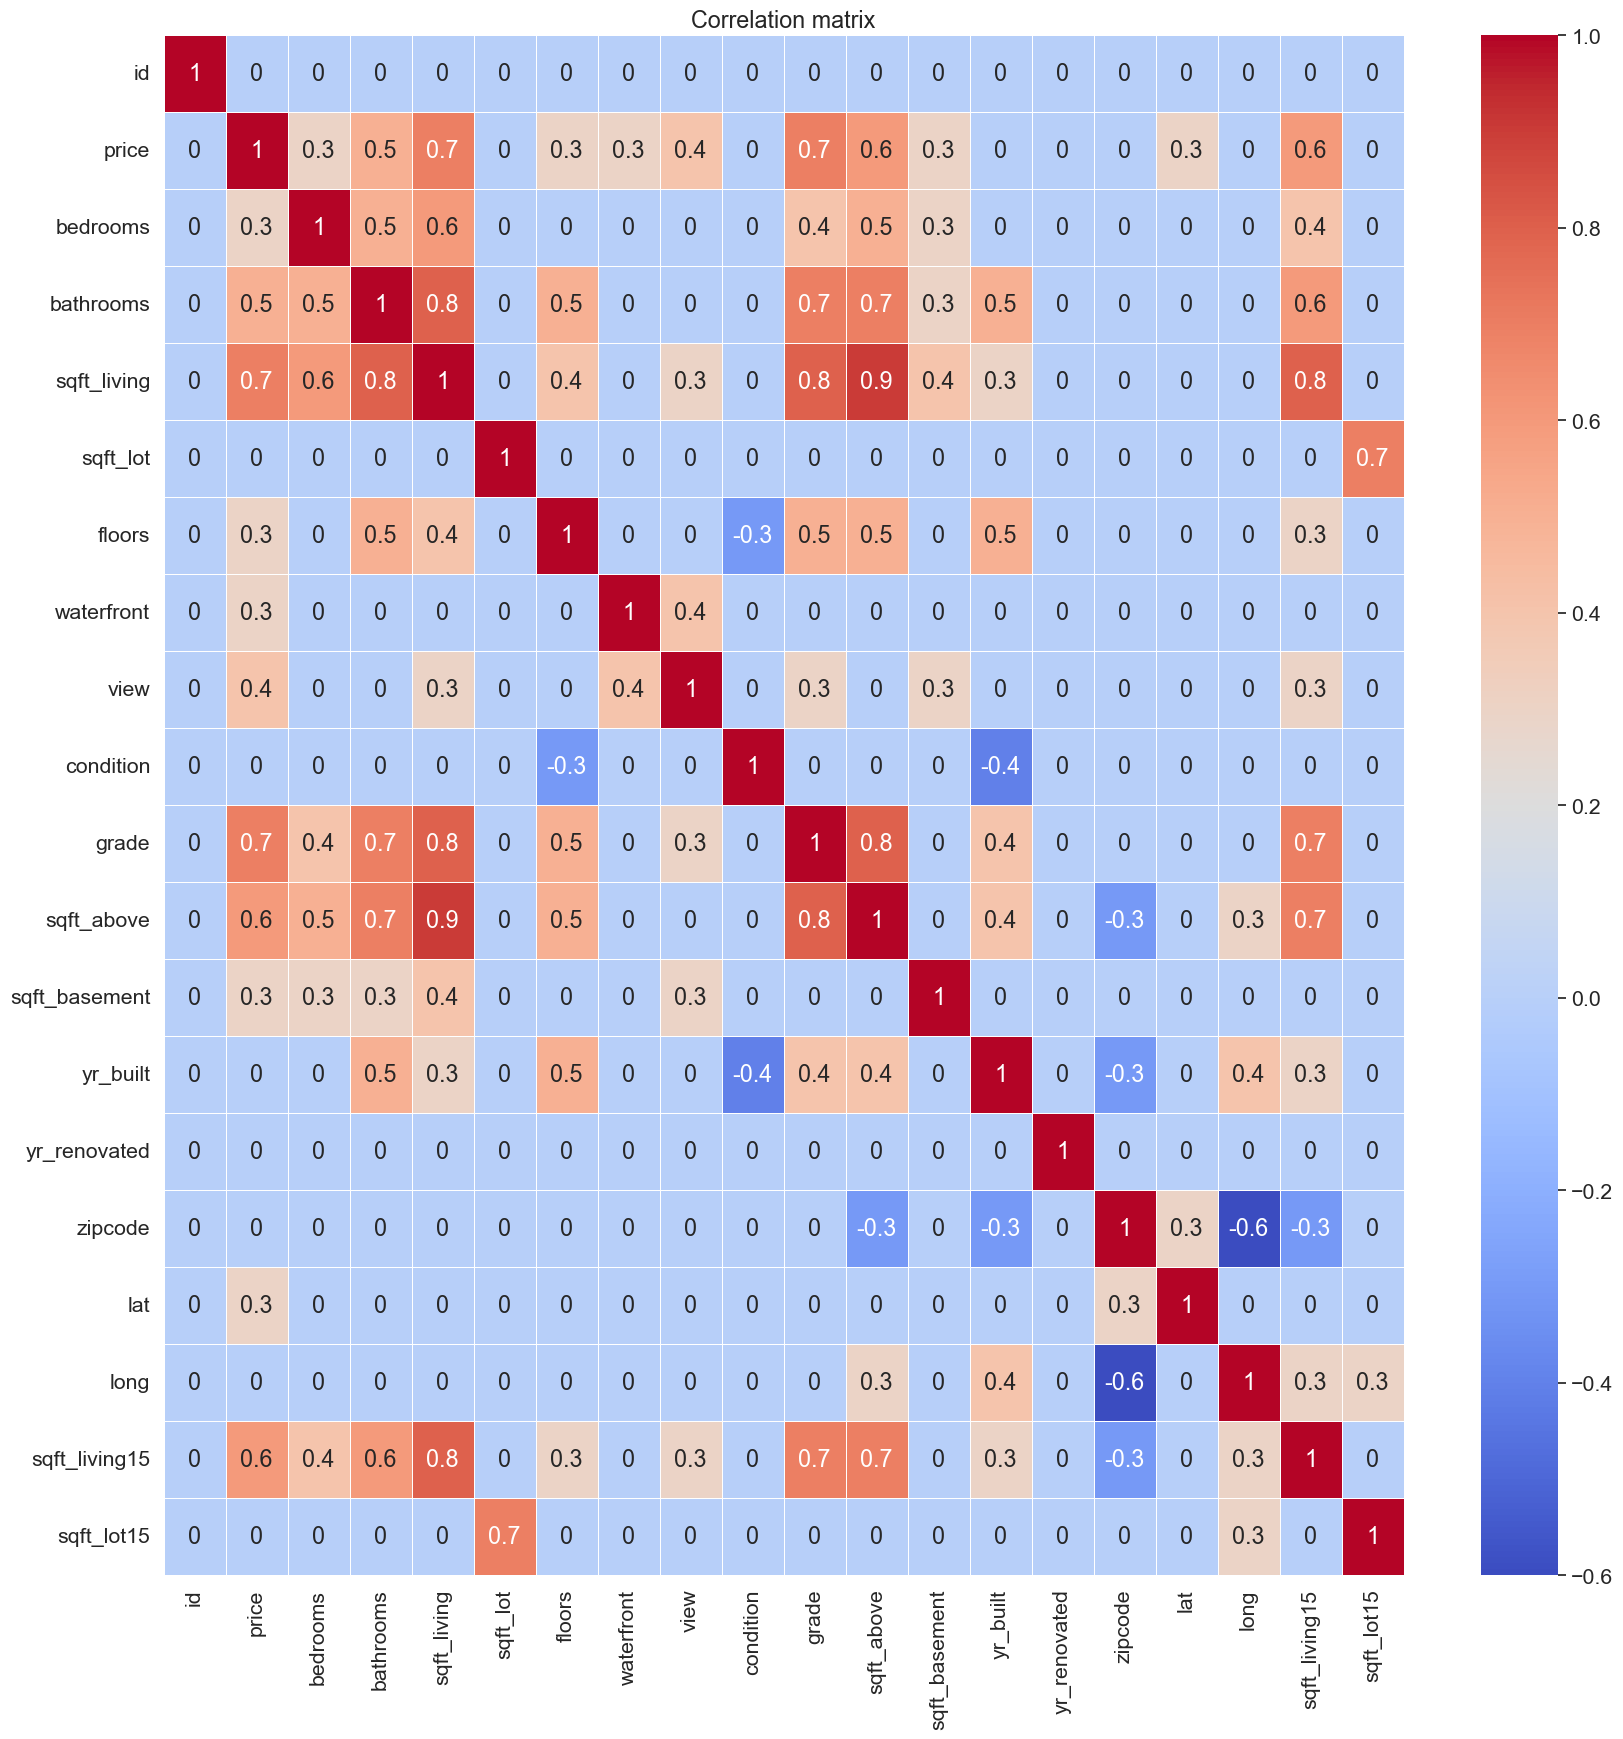

In [24]:
import numpy as np

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

* Можно определить какие признаки в том числе определяют.*
- `batrooms` 0.5
- `sqft_living` 0.7
- `grade` 0.7
- `sqft_above` 0.6
- `sqft_living15` 0.6

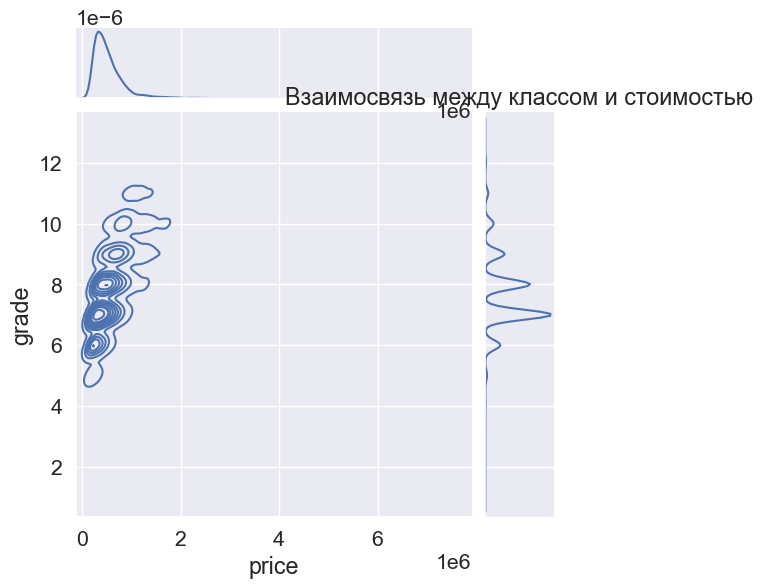

<AxesSubplot:xlabel='price'>

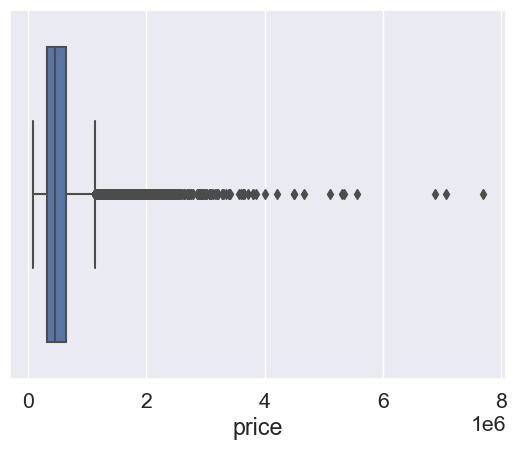

In [28]:
sns.jointplot(x=df['price'], y=df['grade'], kind='kde')
plt.title('Взаимосвязь между классом и стоимостью')
plt.xlabel('Класс')
plt.ylabel('Оценка')
plt.show()
sns.boxplot(x=df['price'], whis=1.5)

* Делаем вывод, что класс напрямую взаимосвязан со стоимостью, в основном дома сосредоточены в 6-8 классе их стоимость до миллиона, а именно 500-700 тысяч